# Target 
    
    To Get a Basic Model which has less than 8000 parameters

# Result
    
    A model with less than 8000 parameters is achived
    test accuracy -> 99.21%
    train accuracy -> 99.46%
    parameters -> 7,964

# Analysis
    
    Model is overfitting, we can introduce some regularization techniques to avoid this and get the perfect model 

In [1]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
from torchsummary import summary
from model import Net
from utils import data_transformation,get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class

CODE BLOCK: 2

In [2]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [3]:
transformation_matrix = {
                         "mean_of_data":(0.1307,),
                         "std_of_data": (0.3081,)
                         }

dataloader_kwargs = {'batch_size': 64, 'shuffle': True, 'num_workers': 1, 'pin_memory': True}


train_transforms, test_transforms = data_transformation(transformation_matrix)
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_data, **dataloader_kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_kwargs)

INFO:utils:transformation Details ::: 


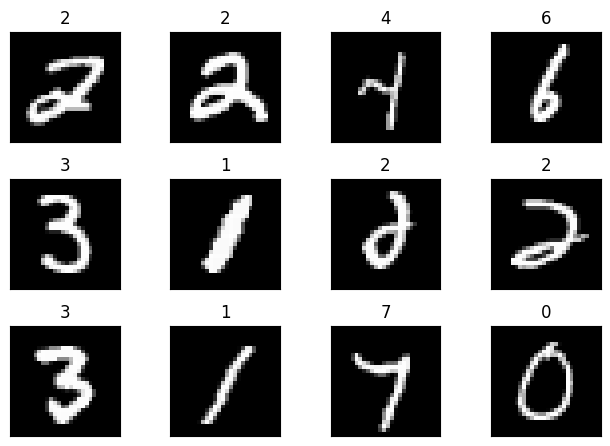

In [4]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [5]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
              ReLU-2            [-1, 4, 26, 26]               0
       BatchNorm2d-3            [-1, 4, 26, 26]               8
            Conv2d-4           [-1, 10, 24, 24]             360
              ReLU-5           [-1, 10, 24, 24]               0
       BatchNorm2d-6           [-1, 10, 24, 24]              20
            Conv2d-7           [-1, 16, 22, 22]           1,440
              ReLU-8           [-1, 16, 22, 22]               0
       BatchNorm2d-9           [-1, 16, 22, 22]              32
        MaxPool2d-10           [-1, 16, 11, 11]               0
           Conv2d-11           [-1, 12, 11, 11]             192
             ReLU-12           [-1, 12, 11, 11]               0
      BatchNorm2d-13           [-1, 12, 11, 11]              24
           Conv2d-14            [-1, 8,

In [6]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.9,
                       "num_epochs":15
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Epoch 1


Train: Loss=0.0254 Batch_id=937 Accuracy=94.52: 100%|██████████| 938/938 [00:29<00:00, 31.81it/s]


Test set: Average loss: 0.0542, Accuracy: 9828/10000 (98.28%)

Epoch 2


Train: Loss=0.0260 Batch_id=937 Accuracy=98.18: 100%|██████████| 938/938 [00:23<00:00, 40.55it/s]


Test set: Average loss: 0.0420, Accuracy: 9861/10000 (98.61%)

Epoch 3


Train: Loss=0.1231 Batch_id=937 Accuracy=98.61: 100%|██████████| 938/938 [00:23<00:00, 39.35it/s]


Test set: Average loss: 0.0327, Accuracy: 9895/10000 (98.95%)

Epoch 4


Train: Loss=0.0025 Batch_id=937 Accuracy=98.77: 100%|██████████| 938/938 [00:24<00:00, 37.83it/s]


Test set: Average loss: 0.0297, Accuracy: 9904/10000 (99.04%)

Epoch 5


Train: Loss=0.0177 Batch_id=937 Accuracy=99.00: 100%|██████████| 938/938 [00:23<00:00, 39.73it/s]


Test set: Average loss: 0.0272, Accuracy: 9913/10000 (99.13%)

Epoch 6


Train: Loss=0.0444 Batch_id=937 Accuracy=98.98: 100%|██████████| 938/938 [00:23<00:00, 39.53it/s]


Test set: Average loss: 0.0271, Accuracy: 9910/10000 (99.10%)

Epoch 7


Train: Loss=0.0510 Batch_id=937 Accuracy=99.13: 100%|██████████| 938/938 [00:23<00:00, 39.38it/s]


Test set: Average loss: 0.0222, Accuracy: 9920/10000 (99.20%)

Epoch 8


Train: Loss=0.0011 Batch_id=937 Accuracy=99.19: 100%|██████████| 938/938 [00:24<00:00, 38.83it/s]


Test set: Average loss: 0.0235, Accuracy: 9925/10000 (99.25%)

Epoch 9


Train: Loss=0.0199 Batch_id=937 Accuracy=99.29: 100%|██████████| 938/938 [00:23<00:00, 39.33it/s]


Test set: Average loss: 0.0311, Accuracy: 9899/10000 (98.99%)

Epoch 10


Train: Loss=0.0103 Batch_id=937 Accuracy=99.32: 100%|██████████| 938/938 [00:23<00:00, 40.17it/s]


Test set: Average loss: 0.0275, Accuracy: 9912/10000 (99.12%)

Epoch 11


Train: Loss=0.0018 Batch_id=937 Accuracy=99.37: 100%|██████████| 938/938 [00:23<00:00, 39.12it/s]


Test set: Average loss: 0.0263, Accuracy: 9918/10000 (99.18%)

Epoch 12


Train: Loss=0.0073 Batch_id=937 Accuracy=99.39: 100%|██████████| 938/938 [00:23<00:00, 39.16it/s]


Test set: Average loss: 0.0256, Accuracy: 9917/10000 (99.17%)

Epoch 13


Train: Loss=0.0486 Batch_id=937 Accuracy=99.48: 100%|██████████| 938/938 [00:24<00:00, 38.72it/s]


Test set: Average loss: 0.0334, Accuracy: 9896/10000 (98.96%)

Epoch 14


Train: Loss=0.0166 Batch_id=937 Accuracy=99.46: 100%|██████████| 938/938 [00:23<00:00, 39.28it/s]


Test set: Average loss: 0.0268, Accuracy: 9909/10000 (99.09%)

Epoch 15


Train: Loss=0.0181 Batch_id=937 Accuracy=99.46: 100%|██████████| 938/938 [00:23<00:00, 39.57it/s]


Test set: Average loss: 0.0227, Accuracy: 9921/10000 (99.21%)



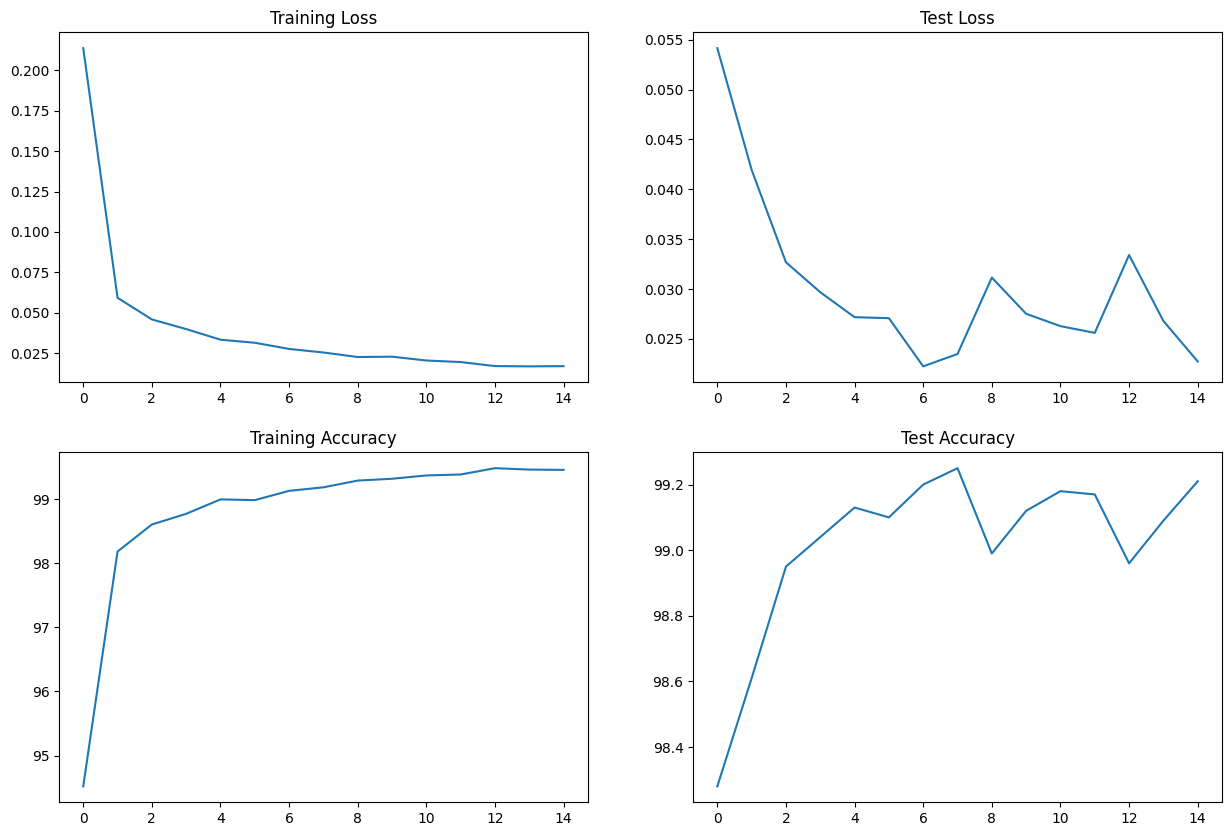

In [7]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

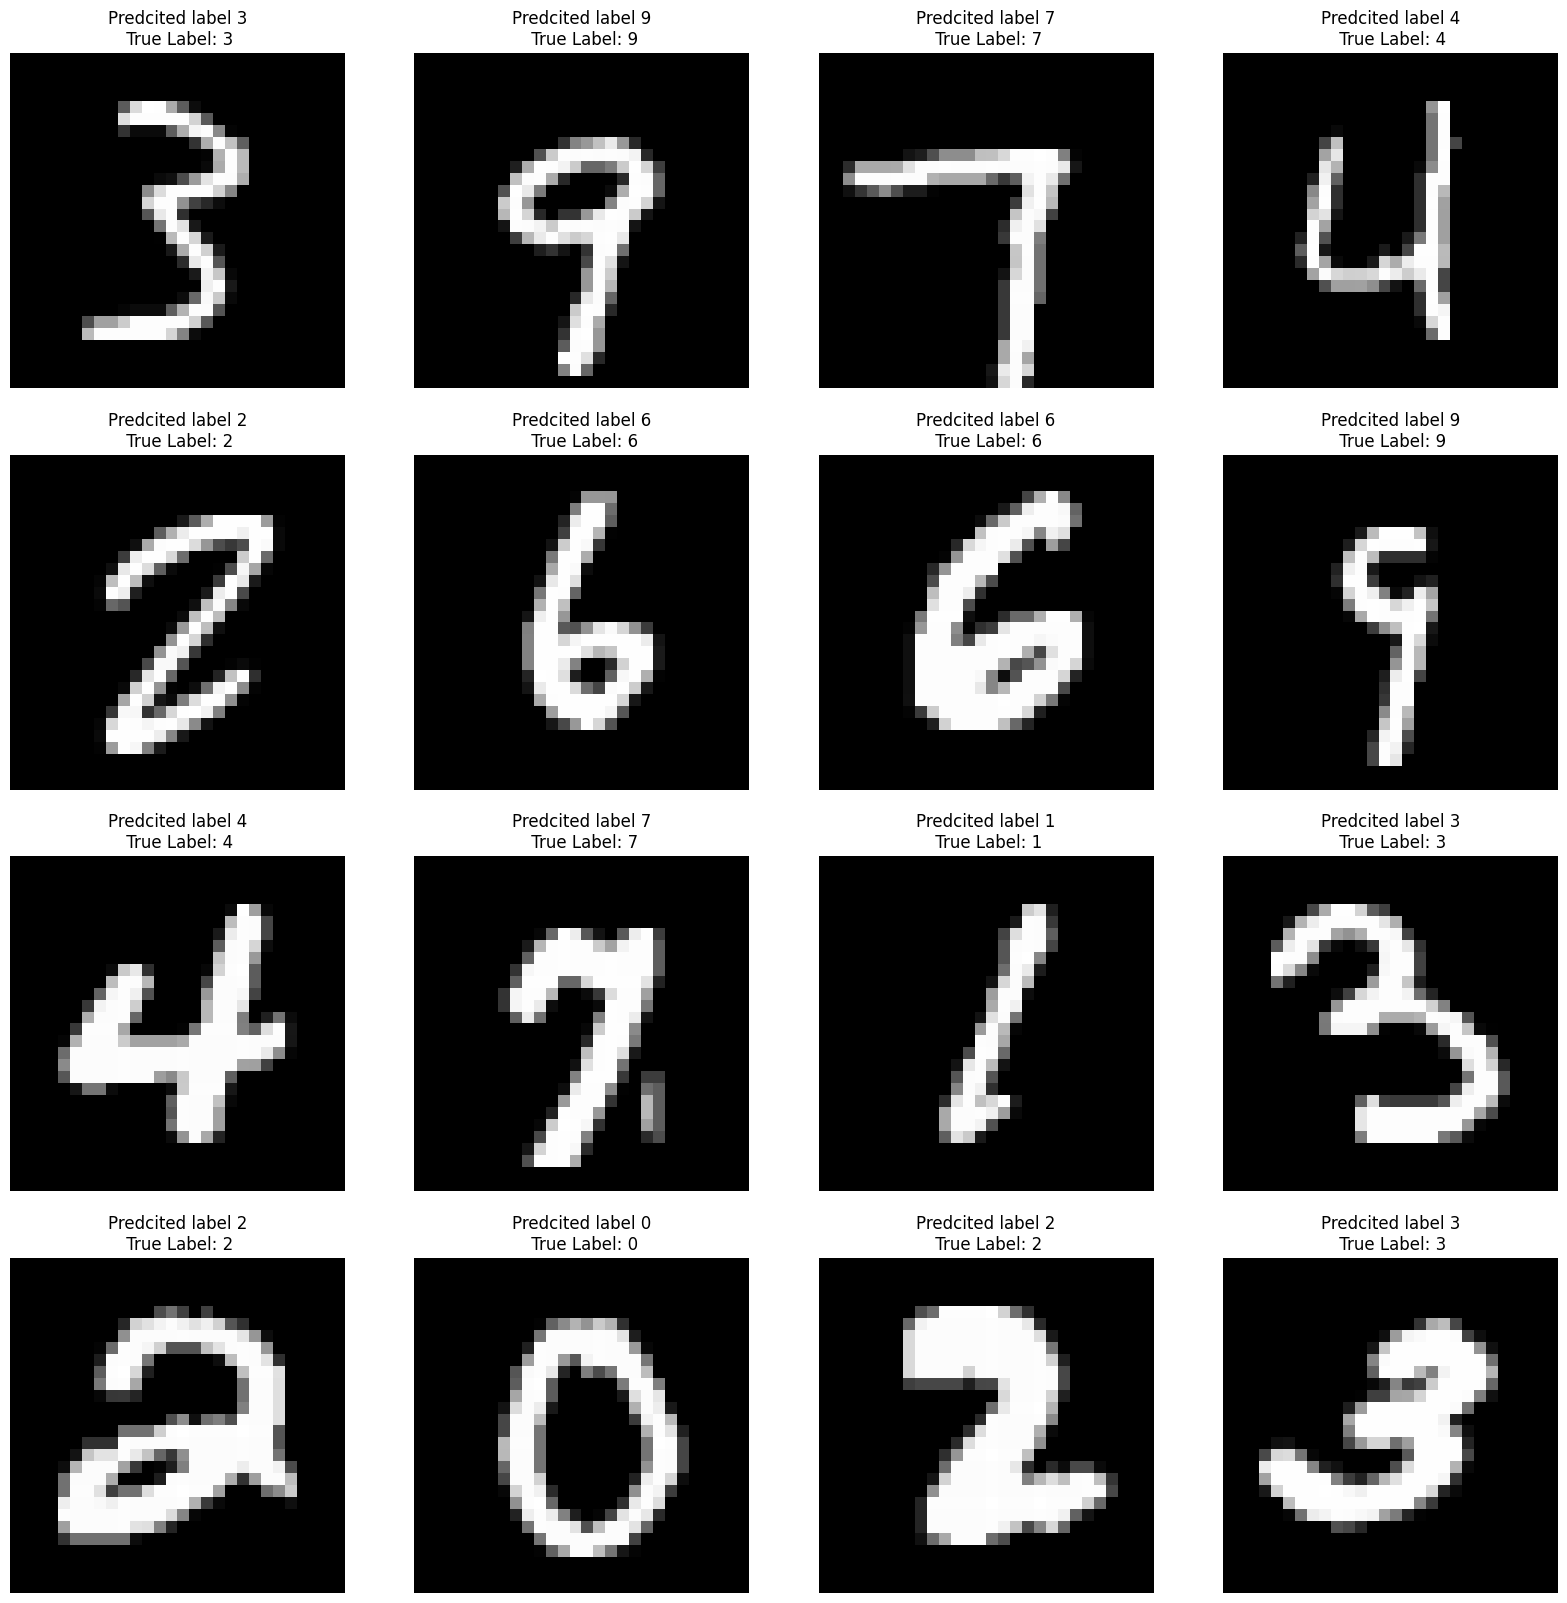

In [8]:
grid_size = (4,4)
show_random_results(test_loader,grid_size,model,device)

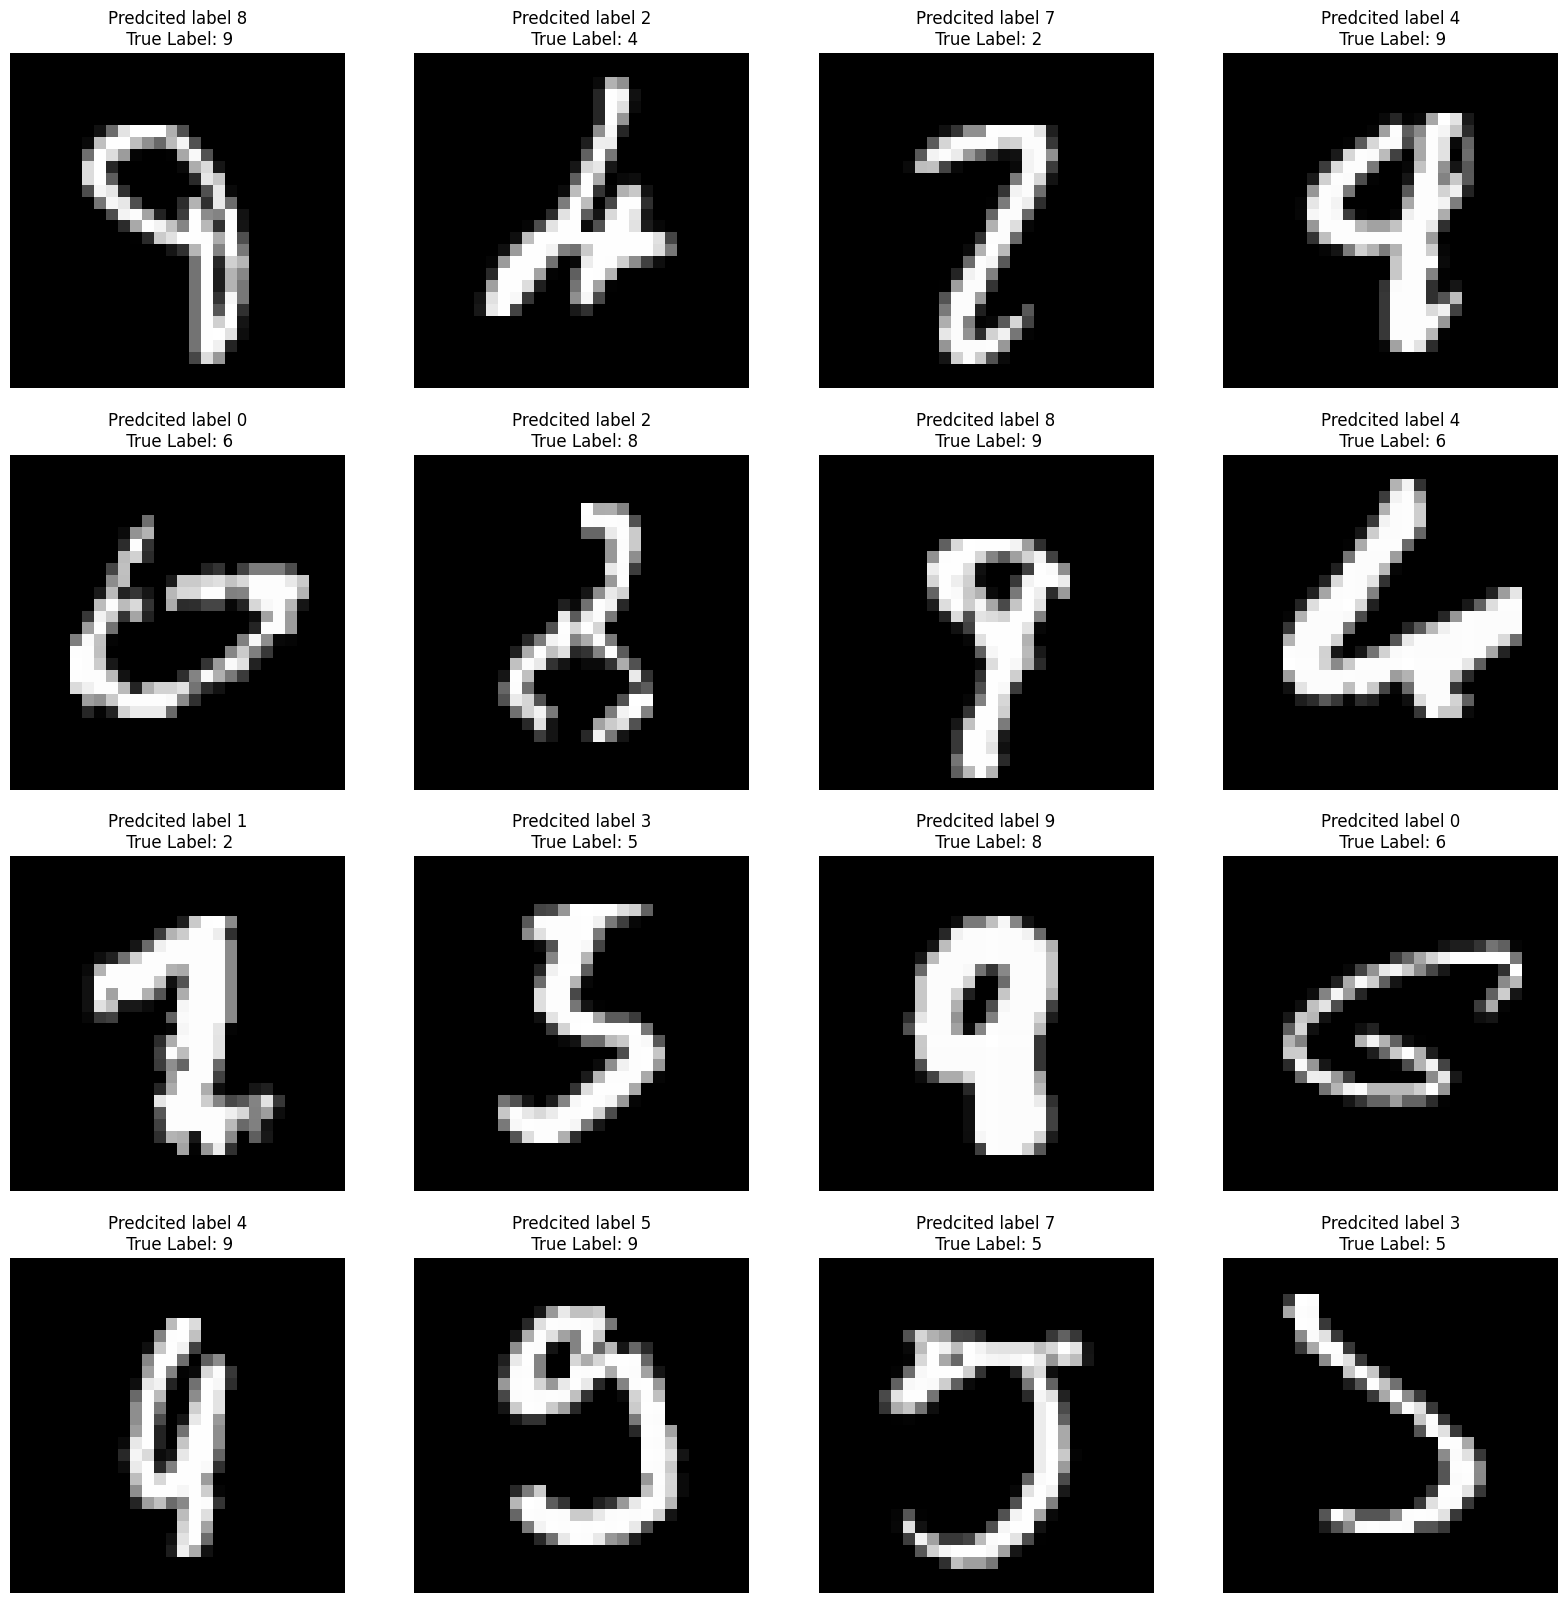

In [9]:
grid_size = (4,4)
plot_misclassified(model,grid_size,test_loader,device)

Accuracy of 0 - zero : 100 %
Accuracy of 1 - one : 98 %
Accuracy of 2 - two : 98 %
Accuracy of 3 - three : 99 %
Accuracy of 4 - four : 99 %
Accuracy of 5 - five : 100 %
Accuracy of 6 - six : 99 %
Accuracy of 7 - seven : 97 %
Accuracy of 8 - eight : 99 %
Accuracy of 9 - nine : 98 %


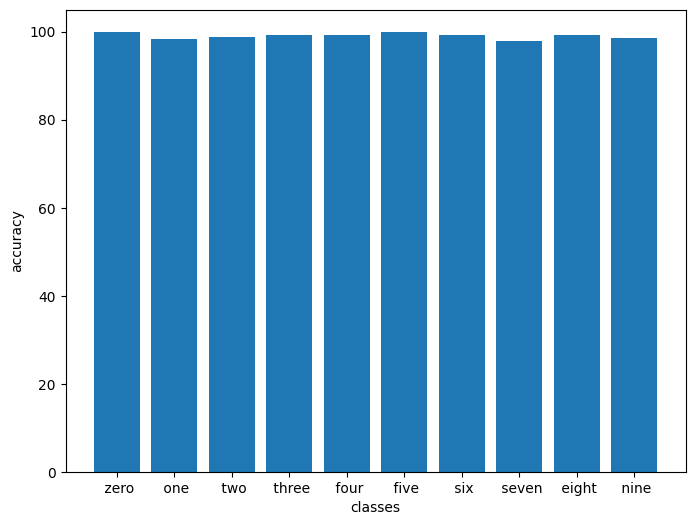

In [10]:
calculate_accuracy_per_class(model,device,test_loader,test_data)